this is a markdown cell - below we are importing the modules
begin with pandas to pull in the csv file as a dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

let's check some intital summaryies and how many missing values

In [ ]:
data.columns

In [3]:
print(len(data))
data.head()

378661


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


we want to check the fields for unique values where expected - if not unique explore why

here ID is unique so irrelevant to further analysis and we can drop before analysis

In [4]:
data.ID.nunique()

378661

In [5]:
data.drop('ID',axis=1,inplace=True)

looking at the names some have been named similarly - particularly new ep/music development
ut looking further they are not duplicates so can continue

In [6]:
data.name.value_counts().head(25)

New EP/Music Development      41
Canceled (Canceled)           13
N/A (Canceled)                11
Music Video                   11
New EP / Music Development    10
Cancelled (Canceled)          10
Debut Album                   10
Reflections                    9
The Journey                    9
Pizza                          8
The Other Side                 8
The Awakening                  8
A Midsummer Night's Dream      8
Pasta Salad                    7
Choices                        7
Through My Eyes                6
Guacamole                      6
Karma                          6
Home                           6
The Mission                    6
Project (Canceled)             6
Broken                         6
The Wall                       6
Romeo & Juliet                 6
Alone                          6
Name: name, dtype: int64

In [7]:
data[data.name == 'New EP/Music Development'] ## different 

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
3836,New EP/Music Development,Music,Music,USD,2015-09-07,3000.0,2015-08-08 20:16:20,0.0,undefined,0,"N,0""",NaN,0.0,3000.0
7743,New EP/Music Development,Music,Music,USD,2016-01-07,3800.0,2015-11-24 15:29:35,257.0,undefined,0,"N,0""",NaN,257.0,3800.0
13622,New EP/Music Development,Rock,Music,USD,2015-04-23,3500.0,2015-03-18 16:20:34,1.0,failed,1,US,1.0,1.0,3500.0
21415,New EP/Music Development,Music,Music,USD,2016-01-28,3000.0,2015-12-21 20:39:56,40.0,undefined,0,"N,0""",NaN,40.0,3000.0
23243,New EP/Music Development,Music,Music,USD,2015-12-14,3000.0,2015-11-09 18:46:47,431.0,undefined,0,"N,0""",NaN,431.0,3000.0
57264,New EP/Music Development,Music,Music,USD,2016-01-01,3000.0,2015-11-23 19:51:57,482.0,undefined,0,"N,0""",NaN,482.0,3000.0
64125,New EP/Music Development,Music,Music,USD,2015-12-28,3000.0,2015-11-17 20:38:31,0.0,undefined,0,"N,0""",NaN,0.0,3000.0
83613,New EP/Music Development,Music,Music,USD,2016-01-07,3000.0,2015-11-24 05:54:25,0.0,undefined,0,"N,0""",NaN,0.0,3000.0
93454,New EP/Music Development,Music,Music,USD,2015-05-31,2000.0,2015-04-27 22:26:23,84.0,undefined,0,"N,0""",NaN,84.0,2000.0
99303,New EP/Music Development,Rock,Music,USD,2015-04-27,2500.0,2015-03-24 21:35:07,11.0,failed,2,US,11.0,11.0,2500.0


let's look at missing values to see what it's like - quite clearly usd pledged has 3797 NaNs which is only 1% of data. As there are over 68000 which raised 0 and some were successful and others failed etc I think we can choose to drop this data as we have enough entries

loking at the 4 blank names they all failed and 1 suspended so we just remove as very little value

In [8]:
data.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [9]:
np.round((data['usd pledged'].isnull().sum()/len(data))*100,5)

1.00274

In [10]:
len(data[data['usd pledged']==0])

68112

In [11]:
data[data['usd pledged'].isnull()]['state'].value_counts()

undefined     3562
failed         105
successful     105
canceled        22
suspended        2
live             1
Name: state, dtype: int64

In [12]:
data[data['usd pledged']==0]['state'].value_counts()

failed        50825
canceled      13120
successful     2490
live           1017
suspended       660
Name: state, dtype: int64

In [13]:
#data['usd pledged'].fillna(value= 0,inplace = True)

In [14]:
data.dropna(axis=0,inplace=True)

In [15]:
data.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

ok now all the data is not null so we can start to visualize 

lets look at the numerical columns first and we can see from our pairplots that backers ahas a linearly increasing relationship with the pledged amount

whqts interssting is that there doesn't seem to be any relationshi between the goal to be raised and how much was pledged.

whats also for further investigatiion is the correlations between the pledged, usd_pledged and usd_pledged real variables and also the goal and goal real varaibles. I would have thought that there would have been a near perfect linear relationship between these. However there are some outliers which suggest that we can't confirm right off the bat that these need to be removed. We keep these variables 

In [16]:
data[~(data['pledged'] == data['usd pledged'])]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
21,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.00,failed,1,AU,0.00,0.81,2026.10
23,Mountain brew: A quest for alcohol sustainability,Drinks,Food,NOK,2015-02-25,500.0,2015-01-26 19:17:33,48.00,failed,3,NO,6.18,6.29,65.55
27,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
28,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91
29,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00
30,Daily Brew Coffee,Food Trucks,Food,GBP,2015-03-31,3500.0,2015-03-01 18:06:32,21.00,failed,1,GB,32.42,31.09,5181.12
31,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.00
32,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.00,successful,18,AU,1473.62,1427.35,1427.35


In [17]:
#sns.pairplot(data)

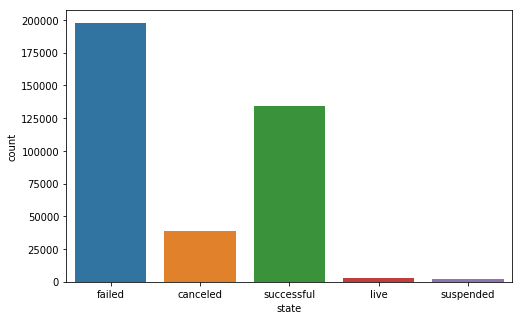

In [18]:
fig = plt.figure(figsize=(8,5))
sns.countplot(data = data, x = data.state)
plt.show()

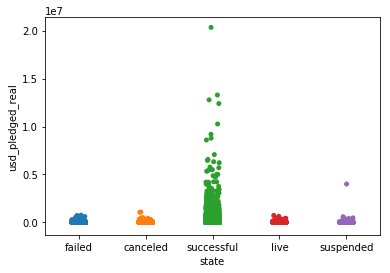

In [19]:
sns.stripplot(x = data.state,y = data.usd_pledged_real,jitter=True)

In [20]:
data.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Feature engineering - here we want to play around with some of features. 

the first one would be to look at the states - whether or not they were successful or not. We can see from below a few projects are still live while others have been suspended - both cases there has yet to be an end result. There has ye to be an end result with these results so therefore well exclude these projects for now. We also have projects that were canceled - these will default to failed as they were not successful. This leaves us with a binary output- successful or not


In [21]:
print(data.state.value_counts())
a = ['live','suspended']
data = data[~data.state.isin(a)]
print(data.state.value_counts().sum())
print(len(data))

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64
370219
370219


In [22]:
data.state.value_counts()

failed        197611
successful    133851
canceled       38757
Name: state, dtype: int64

In [23]:
data.replace(to_replace='canceled',value = 'failed',inplace=True)

In [24]:
data.state.value_counts()

failed        236368
successful    133851
Name: state, dtype: int64

Next is to look at names.Most names are all close to being unique. Obviously this won't tell much so we want to transform this - maybe look at possibly the length of the title and the number of words in the name/ number of letters.

In [25]:
def word(row):
    return len(row['name'].split())

def char(row):
    return round(len(row['name']),-1)

In [26]:
data['word_cnt'] = data.apply(lambda x : word(x),axis=1)
data['number_cnt'] = data.apply(lambda x:char(x),axis = 1)
data.drop('name',axis=1,inplace=True)

In [27]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,6,30
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8,40
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,3,10
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,7,50
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,8,60


next feature is the launch date and deadline - here we could look at the time between launch and deadline. I would also be interested in categorizing the launch date into months to see if the month could effect it. 

In [28]:
def time(row):
    launch = datetime.datetime.strptime(row['launched'],'%Y-%m-%d %H:%M:%S')
    deadline = datetime.datetime.strptime(row['deadline'],'%Y-%m-%d')
    return abs((launch-deadline).days)

def month(row):
    return datetime.datetime.strptime(row['launched'],'%Y-%m-%d %H:%M:%S').month

data['days_raising'] = data.apply(lambda x:time(x),axis=1)

data['launch_month'] = data.apply(lambda x:month(x),axis=1)

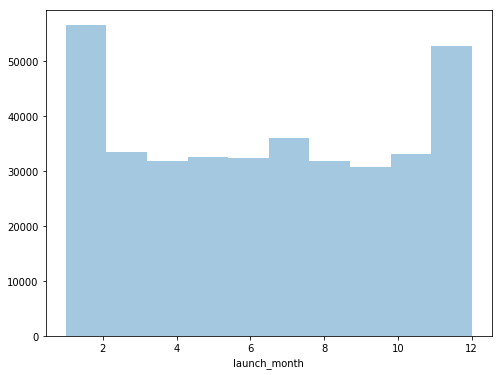

In [30]:
fig = plt.figure(figsize=(8,6))
sns.distplot(data.launch_month,bins=10,kde = False)

i think we can transform the countries into a smaller set - looking a the below I below I believe all we can reduce it to group all countries with less thn 1% together

In [31]:
(data.country.value_counts()/len(data)*100)

US    78.242608
GB     8.971447
CA     3.918762
AU     2.074718
DE     1.095838
FR     0.776027
NL     0.758200
IT     0.749556
ES     0.595323
SE     0.464050
MX     0.440820
NZ     0.384907
DK     0.292530
IE     0.214198
CH     0.198801
NO     0.187457
BE     0.161256
AT     0.155584
HK     0.152342
SG     0.140728
LU     0.016477
JP     0.008373
Name: country, dtype: float64

In [32]:
def Country(row):
    lst = ['US','GB','CA','AU','DE']
    if row['country'] not in lst:
        return 'other'
    else:
        return row['country']

data['new_country'] = data.apply(lambda x: Country(x),axis=1)

In [34]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,6,30,59,8,GB
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8,40,60,9,US
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,3,10,45,1,US
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,7,50,30,3,US
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,8,60,56,7,US


looking at category there are too many fields making it worthless for the model to analyze. However looking at main_category this is grouped better so I will drop category

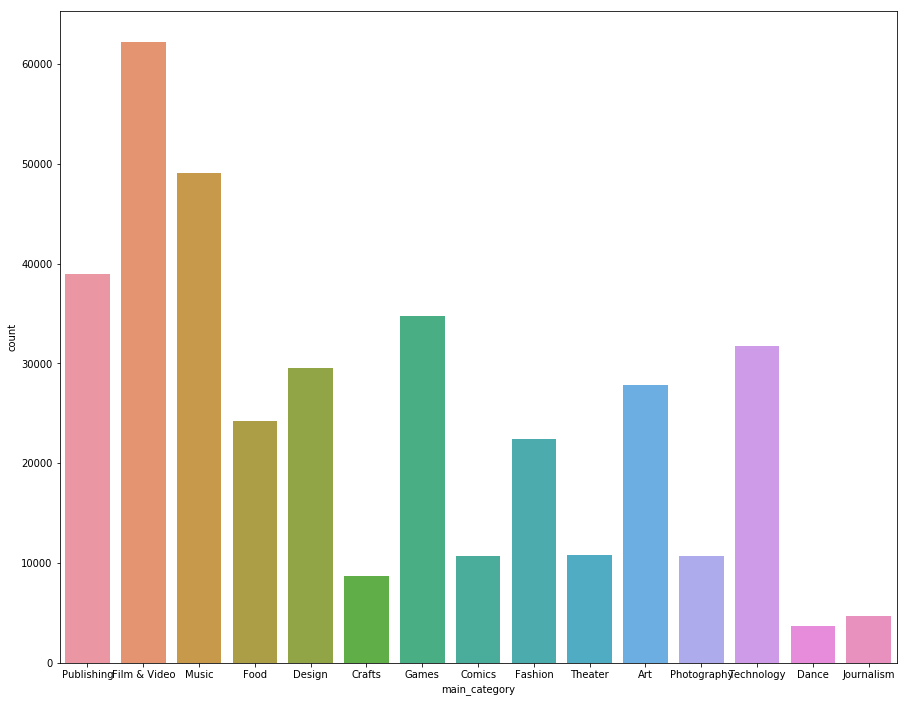

In [35]:
fig = plt.figure(figsize=(15,12))
sns.countplot(data.main_category)

In [36]:
data[~(data.goal == data.usd_goal_real)]

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,6,30,59,8,GB
10,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39,4,20,30,9,CA
14,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73,9,60,28,4,GB
21,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.00,failed,1,AU,0.00,0.81,2026.10,4,30,30,8,AU
23,Drinks,Food,NOK,2015-02-25,500.0,2015-01-26 19:17:33,48.00,failed,3,NO,6.18,6.29,65.55,7,50,30,1,other
26,DIY,Crafts,GBP,2016-01-05,12000.0,2015-12-06 20:09:06,0.00,failed,0,GB,0.00,0.00,17489.65,3,20,30,12,GB
27,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04,2,20,30,11,CA
28,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91,9,50,30,12,GB
30,Food Trucks,Food,GBP,2015-03-31,3500.0,2015-03-01 18:06:32,21.00,failed,1,GB,32.42,31.09,5181.12,3,20,30,3,GB
32,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.00,successful,18,AU,1473.62,1427.35,1427.35,6,40,30,7,AU


looking at backers again the distribution is too large so the model would find it very difficult to use this feature as it is. I want to try regroup this into groups where there is a somewhat even distribution makingthe feature more robust and easier to interpret.

In [37]:
data[data.backers == max(data.backers)]

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country
187652,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,2,20,31,1,US


In [38]:
print(data.backers.value_counts()[0].sum())
print(data.backers.value_counts()[1].sum())
print(data.backers.value_counts()[2].sum())
print(data.backers.value_counts()[3:6].sum())
print(data.backers.value_counts()[6:11].sum())
print(data.backers.value_counts()[11:21].sum())
print(data.backers.value_counts()[21:36].sum())
print(data.backers.value_counts()[36:51].sum())
print(data.backers.value_counts()[51:81].sum())
print(data.backers.value_counts()[81:151].sum())
print(data.backers.value_counts()[151:501].sum())
print(data.backers.value_counts()[501:].sum())

50650
34279
22866
37340
31581
36457
34004
22689
29018
30059
28856
12420


In [39]:
def backers(row):
    if row['backers']==0:
        return '0'
    elif row['backers']==1:
        return '1'
    elif row['backers']==2:
        return '2'
    elif row['backers']>=3 & row['backers']<=5 :
        return '3-5'
    elif row['backers']>=6 & row['backers']<=10 :
        return '6-10'
    elif row['backers']>=11 & row['backers']<=20 :
        return '11-20'
    elif row['backers']>=21 & row['backers']<=35 :
        return '21-35'
    elif row['backers']>=36 & row['backers']<=50 :
        return '36-50'
    elif row['backers']>=51 & row['backers']<=80 :
        return '51-80'
    elif row['backers']>=81 & row['backers']<=150 :
        return '81-150'
    elif row['backers']>=151 & row['backers']<=499 :
        return '151-499'
    elif row['backers']>=500:
        return '500+'
    
    

In [40]:
data['backers_group'] = data.apply(lambda x: backers(x),axis=1)

In [41]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country,backers_group
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,6,30,59,8,GB,0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8,40,60,9,US,3-5
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,3,10,45,1,US,3-5
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,7,50,30,3,US,1
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,8,60,56,7,US,3-5


now we have completed feature engineering we can begin to tidy up our data and begin the process of normalizing our data.  I drop features category,currency, deadline,launched,backers,country as new features have been inroduced.

I also want to transform the categorical variables into numerical values so that they can be passed into our model. The categorical variables we have are state,backers_group,country

As some ML models rely on the sizes of features we want features all to be centered around 0 so that one feature doesn't have more influence on the model.
The standardisation process I use is from sklearns MinMaxScaler

In [42]:
data.dtypes

category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
word_cnt              int64
number_cnt            int64
days_raising          int64
launch_month          int64
new_country          object
backers_group        object
dtype: object

In [43]:
data.drop(['category','currency','deadline','launched','backers','country'],axis=1,inplace = True)

In [44]:
data.reset_index(inplace=True,drop=True)
data.head()

,main_category,goal,pledged,state,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country,backers_group
0,Publishing,1000.0,0.0,failed,0.0,0.0,1533.95,6,30,59,8,GB,0
1,Film & Video,30000.0,2421.0,failed,100.0,2421.0,30000.00,8,40,60,9,US,3-5
2,Film & Video,45000.0,220.0,failed,220.0,220.0,45000.00,3,10,45,1,US,3-5
3,Music,5000.0,1.0,failed,1.0,1.0,5000.00,7,50,30,3,US,1
4,Film & Video,19500.0,1283.0,failed,1283.0,1283.0,19500.00,8,60,56,7,US,3-5


In [45]:
data['category'] = data.main_category.astype('category').cat.codes
data['cat_state'] = data.state.astype('category').cat.codes
data['country'] = data.new_country.astype('category').cat.codes
data['backers'] = data.backers_group.astype('category').cat.codes


In [46]:
data.cat_state.value_counts()

0    236368
1    133851
Name: cat_state, dtype: int64

In [47]:
data.head()

,main_category,goal,pledged,state,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,new_country,backers_group,category,cat_state,country,backers
0,Publishing,1000.0,0.0,failed,0.0,0.0,1533.95,6,30,59,8,GB,0,12,0,3,0
1,Film & Video,30000.0,2421.0,failed,100.0,2421.0,30000.00,8,40,60,9,US,3-5,6,0,4,3
2,Film & Video,45000.0,220.0,failed,220.0,220.0,45000.00,3,10,45,1,US,3-5,6,0,4,3
3,Music,5000.0,1.0,failed,1.0,1.0,5000.00,7,50,30,3,US,1,10,0,4,1
4,Film & Video,19500.0,1283.0,failed,1283.0,1283.0,19500.00,8,60,56,7,US,3-5,6,0,4,3


In [48]:
model_data = data.drop(['main_category','state','new_country','backers_group'],axis=1)

In [49]:
model_data.head()

,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,category,cat_state,country,backers
0,1000.0,0.0,0.0,0.0,1533.95,6,30,59,8,12,0,3,0
1,30000.0,2421.0,100.0,2421.0,30000.00,8,40,60,9,6,0,4,3
2,45000.0,220.0,220.0,220.0,45000.00,3,10,45,1,6,0,4,3
3,5000.0,1.0,1.0,1.0,5000.00,7,50,30,3,10,0,4,1
4,19500.0,1283.0,1283.0,1283.0,19500.00,8,60,56,7,6,0,4,3


In [50]:
model_data.dtypes

goal                float64
pledged             float64
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
word_cnt              int64
number_cnt            int64
days_raising          int64
launch_month          int64
category               int8
cat_state              int8
country                int8
backers                int8
dtype: object

first we want to split our data into test and train data. We then standardize on the train data and apply this to the test data this way it allows the test data not to be included and

In [51]:
X = model_data.drop('cat_state', axis = 1)
y = model_data.cat_state
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [52]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(x_test),columns= x_test.columns)

In [53]:
X_train_scaled.head()

,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,category,country,backers
0,0.000150,0.001236,0.001236,0.001236,0.000090,0.321429,0.6,0.001969,0.181818,0.714286,0.8,1.000000
1,0.000150,0.001281,0.001281,0.001281,0.000090,0.000000,0.1,0.001969,0.818182,0.714286,0.8,1.000000
2,0.000030,0.000018,0.000018,0.000018,0.000018,0.107143,0.2,0.002987,0.636364,0.428571,0.8,1.000000
3,0.000030,0.000148,0.000114,0.000107,0.000013,0.107143,0.3,0.002308,0.454545,0.571429,0.0,1.000000
4,0.000045,0.000005,0.000005,0.000005,0.000024,0.071429,0.3,0.004005,0.636364,0.500000,0.2,0.666667


In [54]:
X_test_scaled.head()

,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,word_cnt,number_cnt,days_raising,launch_month,category,country,backers
0,0.000050,4.221491e-04,4.221491e-04,4.221491e-04,0.000030,0.142857,0.2,0.002376,0.909091,0.428571,0.8,1.000000
1,0.000150,7.824822e-08,7.824822e-08,7.824822e-08,0.000090,0.035714,0.2,0.004005,0.454545,0.857143,0.8,0.333333
2,0.000015,4.226186e-04,4.226186e-04,4.226186e-04,0.000009,0.178571,0.4,0.002987,0.090909,0.571429,0.8,1.000000
3,0.000200,0.000000e+00,0.000000e+00,0.000000e+00,0.000093,0.035714,0.1,0.001901,0.727273,0.928571,0.2,0.000000
4,0.000035,1.956205e-05,1.956205e-05,1.956205e-05,0.000021,0.035714,0.2,0.002647,0.545455,0.428571,0.8,0.333333


now our data is scaled so we are ready to fit our model using ML classification methods. As this is a multicalls problem I'm going to fus on optimizng a KNN model, a tree based model, and a SVM model although SVM models are notably using on binary classfication models

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[60751 10148]
 [10785 29382]]
             precision    recall  f1-score   support

          0       0.85      0.86      0.85     70899
          1       0.74      0.73      0.74     40167

avg / total       0.81      0.81      0.81    111066



In [56]:
error_rate = []
j = 1
while j<=32:
    print(j)
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train_scaled,y_train)
    pred_knn = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_knn != y_test))
    print(classification_report(pred_knn,y_test))
    j+=10

1
             precision    recall  f1-score   support

          0       0.86      0.85      0.85     71536
          1       0.73      0.74      0.74     39530

avg / total       0.81      0.81      0.81    111066

11
             precision    recall  f1-score   support

          0       0.86      0.82      0.84     74488
          1       0.67      0.74      0.70     36578

avg / total       0.80      0.79      0.80    111066

21
             precision    recall  f1-score   support

          0       0.86      0.80      0.83     75694
          1       0.63      0.72      0.67     35372

avg / total       0.79      0.78      0.78    111066

31
             precision    recall  f1-score   support

          0       0.85      0.80      0.82     76011
          1       0.61      0.70      0.65     35055

avg / total       0.78      0.77      0.77    111066



our next model is to look at a tree based model. I am going to use a random forest approach for this and aim to optimize this

In [58]:
tree_error = []
i=50
while i<=551:
    print(i)
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train_scaled,y_train)
    pred_rfc = rfc.predict(X_test_scaled)
    tree_error.append(np.mean(y_test != pred_rfc))
    print(classification_report(y_test,pred_rfc))
    i+=100

50
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1       0.99      1.00      1.00     40167

avg / total       1.00      1.00      1.00    111066

150
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1       0.99      1.00      1.00     40167

avg / total       1.00      1.00      1.00    111066

250
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1       0.99      1.00      1.00     40167

avg / total       1.00      1.00      1.00    111066

350
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1       0.99      1.00      1.00     40167

avg / total       1.00      1.00      1.00    111066

450
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1   

lastly were looking at a SVM model which is known to perfrom well in binary classification problems

In [59]:
model_svc = SVC()
model_svc.fit(X_train_scaled,y_train)
pred_svm = model_svc.predict(X_test_scaled)
print(classification_report(y_test,pred_svm))

             precision    recall  f1-score   support

          0       0.77      0.72      0.74     70899
          1       0.55      0.61      0.58     40167

avg / total       0.69      0.68      0.68    111066



In [61]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train_scaled,y_train)
pred_rfc = rfc.predict(X_test_scaled)
print(classification_report(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70899
          1       0.99      1.00      1.00     40167

avg / total       1.00      1.00      1.00    111066



In [62]:
from sklearn.externals import joblib

In [64]:
joblib.dump(rfc,'Models/class_model.pkl')

['Models/class_model.pkl']

In [65]:
joblib.dump(scaler,'Models/scaler.pkl')

['Models/scaler.pkl']